In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
import matplotlib.pyplot as plt

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
''' 
    network          : [top] <---> [pen] ---> [hid] ---> [vis] 
                               `-> [lbl] 
    lbl : label
    top : top
    pen : penultimate
    hid : hidden
    vis : visible
'''
"""
Args:
  sizes: Dictionary of layer names and dimensions
  image_size: Image dimension of data
  n_labels: Number of label categories
  batch_size: Size of mini-batch
"""
lbl=10
top=2000
pen=500
hid=500
vis=28*28
sizes={"lbl":lbl,"top":top,"pen":pen,"hid":hid,"vis":vis}
batch_size = 32
n_labels = lbl

In [3]:
#crete a DBN

dbn = DeepBeliefNet(sizes=sizes,image_size=image_size,n_labels=n_labels,batch_size=batch_size)


In [4]:
#train the dbn
n_iterations =10
dbn.train_greedylayerwise(vis_trainset=train_imgs,lbl_trainset=train_lbls,n_iterations=n_iterations)

training vis--hid
learning CD1
iteration=      0 recon_loss=46.5658
iteration=      1 recon_loss=44.3378
iteration=      2 recon_loss=44.5881
iteration=      3 recon_loss=44.3319
iteration=      4 recon_loss=44.0113
iteration=      5 recon_loss=43.7477
iteration=      6 recon_loss=42.9697
iteration=      7 recon_loss=43.2555
iteration=      8 recon_loss=43.3884
iteration=      9 recon_loss=42.9638
training hid--pen
learning CD1
iteration=      0 recon_loss=8.7883
iteration=      1 recon_loss=7.2759
iteration=      2 recon_loss=6.4062
iteration=      3 recon_loss=5.7744
iteration=      4 recon_loss=5.3304
iteration=      5 recon_loss=5.0833
iteration=      6 recon_loss=4.8310
iteration=      7 recon_loss=4.7027
iteration=      8 recon_loss=4.4300
iteration=      9 recon_loss=4.3602
training pen+lbl--top
learning CD1
iteration=      0 recon_loss=272.3102
iteration=      1 recon_loss=276.2466
iteration=      2 recon_loss=278.5277
iteration=      3 recon_loss=277.3897
iteration=      4 rec

/Users/physics/PycharmProjects/DD2437_ANN/Lab4/code/util.py:15: RuntimeWarning: overflow encountered in exp
  on_probabilities = 1. / (1. + np.exp(-support))


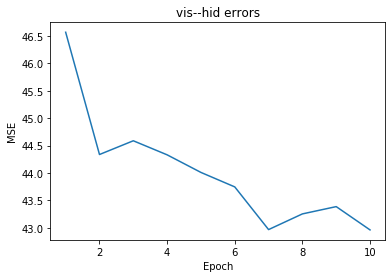

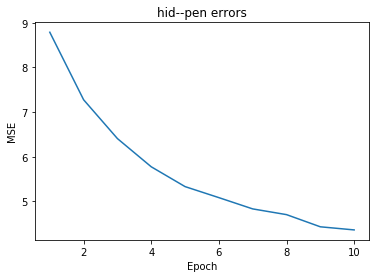

In [5]:
#show the errors of first two RBMs
x=[i+1 for i in range(n_iterations)]
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.vis_hid_errors)
plt.title("vis--hid errors")
plt.show()
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,dbn.hid_pen_errors)
plt.title("hid--pen errors")
plt.show()

In [7]:
print(dbn.label_log)
print(dbn.label_log)


[]
[]
